<a href="https://colab.research.google.com/github/stVan123/Classification-Model---Primary-Tumor-Dataset-UCI-/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data [`Primary Tumor`](https://archive.ics.uci.edu/ml/datasets/Primary+Tumor) 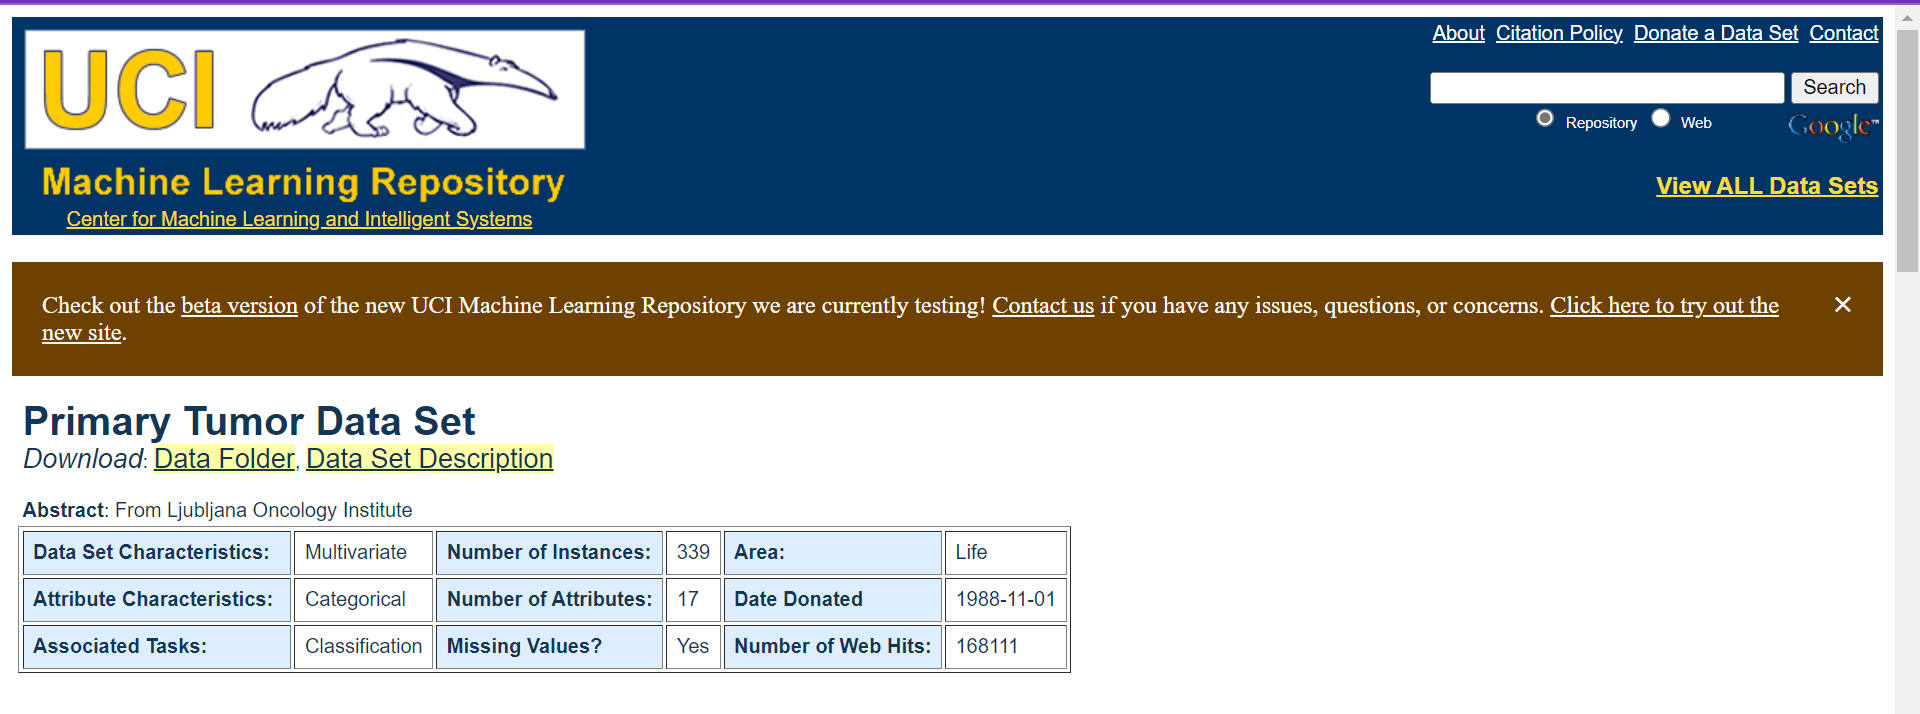

Target class: 

1. lung
2. head & neck
3. esophasus
4. thyroid
5. stomach
6. duoden & sm.int
7. colon
8. rectum
9. anus
10. salivary glands
11. pancreas
12. gallblader
13. liver
14. kidney
15. bladder
16. testis
17. prostate
18. ovary
19. corpus uteri
20. cervix uteri
21. vagina
22. breast

3 Classifier used in this model: 

1. K-Nearest Neighbors
2. Decision Tree Classifier
3. Random Forest Classifier

Train and test process using Cross validation method with accuracy, F1-Score, Recall, Precision, and Confusion Matrix as the evaluation metrics


--------------------------------------------------------------------------------

# Library dan Fungsi Tambahan Lainnya

In [ ]:
!pip install six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno 
import seaborn as sns

%matplotlib inline

# Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Train test
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

# Metrics dan Cross validation
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# Visualisasi DT
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#fungsi confusion matrix

def confmatrix(y_pred, title):
    cm = metrics.confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    
    plt.figure(figsize = (10,7))
    plt.title(title)
    
    sns.set(font_scale=1.2) # For label size
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 10}) # Font size

# fungsi mengubah classification_report menjadi dataframe

def get_classification_report(y_test, y_pred):
    from sklearn import metrics
    report = metrics.classification_report(y_test, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    df_classification_report = df_classification_report
    return df_classification_report
   
#target nama untuk confusion matrix
target_names = ['lung','stomach', 'ovary','pancreas','kidney','breast','head & neck','gallblader','thyroid','colon']

# Load dataset dan Preprocessing

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


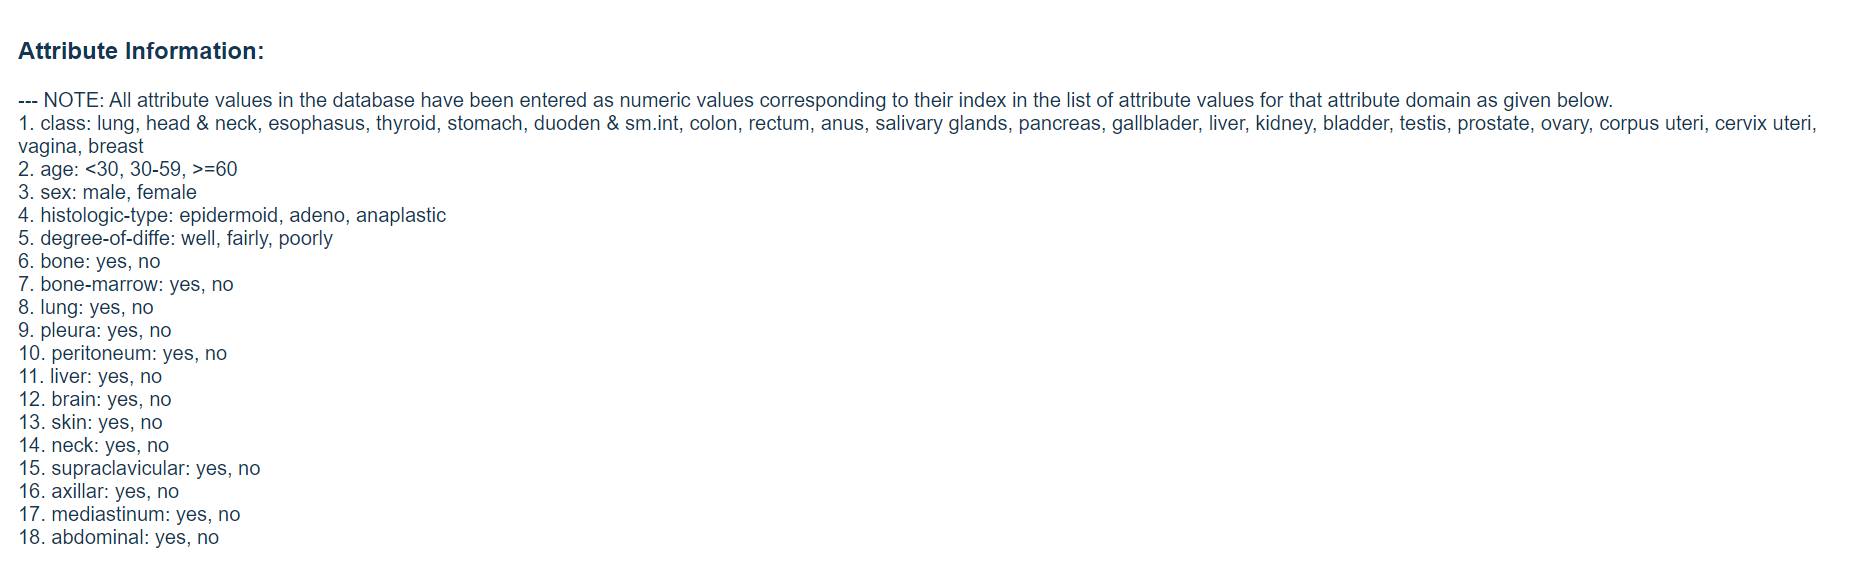

In [ ]:
# Nama kolom sesuai dengan infromasi atribut yang ada pada dataset UCI

col_names = ['class','age', 'sex', 'histologic-type','degree-of-diffe', 'bone', 'bone-marrow','lung','pleura','peritoneum','liver','brain','skin','neck','supraclavicular','axillar','mediastinum','abdominal']

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/KULIAH/KELAS AI/primary-tumor.data', names=col_names) #read data dengan nama kolom sesuai dengan atribut di list col_names
df

class  age sex histologic-type degree-of-diffe  bone  bone-marrow  lung  \
0        1    1   1               ?               3     2            2     1   
1        1    1   1               ?               3     2            2     2   
2        1    1   2               2               3     1            2     2   
3        1    1   2               ?               3     1            2     1   
4        1    1   2               ?               3     1            2     1   
..     ...  ...  ..             ...             ...   ...          ...   ...   
334     22    2   2               2               ?     2            2     2   
335     22    2   2               2               ?     2            2     2   
336     22    2   2               ?               ?     1            2     2   
337     22    3   2               2               2     2            2     2   
338     22    3   2               2               2     2            2     2   

     pleura  peritoneum  liver  brain skin  neck  supraclavicular axillar  \
0         2           2      2      2    2     2                2       2   
1         2           2      1      2    2     2                1       2   
2         2           2      2      2    2     2                2       2   
3         1           2      2      2    2     2                2       2   
4         1           2      2      2    2     2                2       2   
..      ...         ...    ...    ...  ...   ...              ...     ...   
334       2           2      2      2    2     2                2       1   
335       2           2      2      2    2     2                2       1   
336       2           2      2      2    2     2                1       1   
337       2           2      2      2    2     1                1       1   
338       2           2      2      2    2     2                1       1   

     mediastinum  abdominal  
0              2          2  
1              1          2  
2              1          2  
3              1          2  
4              1          2  
..           ...        ...  
334            2          2  
335            2          2  
336            2          2  
337            2          2  
338            2          2  

[339 rows x 18 columns]

Mengubah data dengan string "?" menjadi numpy nan agar bisa dilakukan processing

In [ ]:
df= df.replace('?', np.nan)
df

class  age sex histologic-type degree-of-diffe  bone  bone-marrow  lung  \
0        1    1   1             NaN               3     2            2     1   
1        1    1   1             NaN               3     2            2     2   
2        1    1   2               2               3     1            2     2   
3        1    1   2             NaN               3     1            2     1   
4        1    1   2             NaN               3     1            2     1   
..     ...  ...  ..             ...             ...   ...          ...   ...   
334     22    2   2               2             NaN     2            2     2   
335     22    2   2               2             NaN     2            2     2   
336     22    2   2             NaN             NaN     1            2     2   
337     22    3   2               2               2     2            2     2   
338     22    3   2               2               2     2            2     2   

     pleura  peritoneum  liver  brain skin  neck  supraclavicular axillar  \
0         2           2      2      2    2     2                2       2   
1         2           2      1      2    2     2                1       2   
2         2           2      2      2    2     2                2       2   
3         1           2      2      2    2     2                2       2   
4         1           2      2      2    2     2                2       2   
..      ...         ...    ...    ...  ...   ...              ...     ...   
334       2           2      2      2    2     2                2       1   
335       2           2      2      2    2     2                2       1   
336       2           2      2      2    2     2                1       1   
337       2           2      2      2    2     1                1       1   
338       2           2      2      2    2     2                1       1   

     mediastinum  abdominal  
0              2          2  
1              1          2  
2              1          2  
3              1          2  
4              1          2  
..           ...        ...  
334            2          2  
335            2          2  
336            2          2  
337            2          2  
338            2          2  

[339 rows x 18 columns]

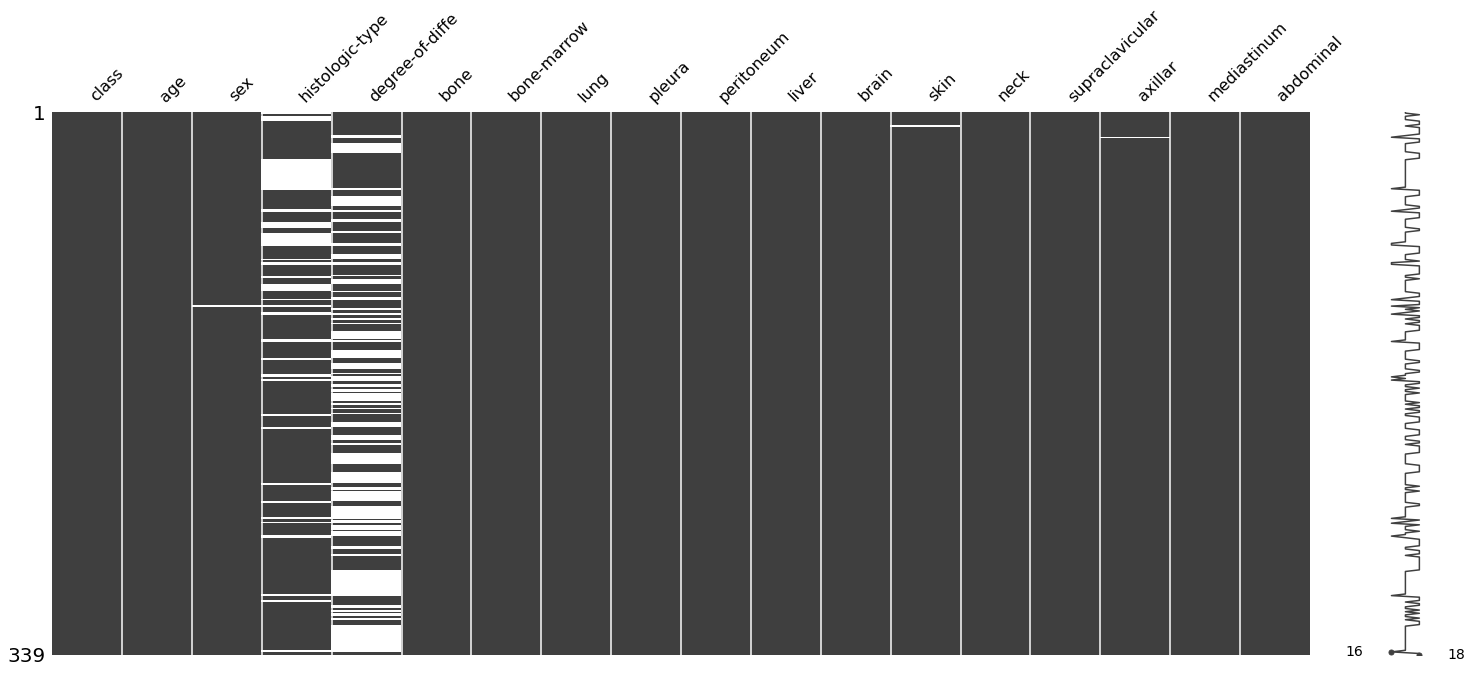

In [ ]:
missingno.matrix(df)

In [ ]:
df = df.drop(['histologic-type', 'degree-of-diffe'], axis=1) # dilakukan drop karena terlalu banyak data NaN

Terdapat banyak data NaN pada beberapa kolom data dan disini kelompok 6 menggunakan syntax fillna dengan mengambil modus data untuk mengganti nilai value NaN

In [ ]:
missing_col = ['sex','skin','axillar']

In [ ]:
for col in missing_col: 
    df[col]=df[col].fillna(int(df[col].mode()))

In [ ]:
df_missing_2 = pd.DataFrame(df.isnull().sum()/df.shape[0],columns=['missing_rate']).reset_index() 
df_missing_2.sort_values(by='missing_rate',ascending=False)[:15]

index  missing_rate
0             class           0.0
1               age           0.0
2               sex           0.0
3              bone           0.0
4       bone-marrow           0.0
5              lung           0.0
6            pleura           0.0
7        peritoneum           0.0
8             liver           0.0
9             brain           0.0
10             skin           0.0
11             neck           0.0
12  supraclavicular           0.0
13          axillar           0.0
14      mediastinum           0.0

Data missing telah difilter dengan nilai modus dari setiap kolom

In [ ]:
value_counts = df['class'].value_counts()
value_counts

1     84
5     39
18    29
11    28
14    24
22    24
2     20
12    16
7     14
4     14
17    10
3      9
13     7
8      6
19     6
10     2
15     2
20     2
6      1
16     1
21     1
Name: class, dtype: int64

Kelas dengan jumlah data < 10 akan di drop 

In [ ]:
remove = value_counts[value_counts <=10].index
df = df[~df['class'].isin(remove)]

In [ ]:
value_counts = df['class'].value_counts()
value_counts

1     84
5     39
18    29
11    28
14    24
22    24
2     20
12    16
4     14
7     14
Name: class, dtype: int64

Class yang dipakai:

'1. lung


'5. stomach


'18. ovary


'11. pancreas


'14. kidney


'22. breast


'2. head & neck


'12. gallblader


'4. thyroid


'7. colon



Melakukan pengubahan nomor kelas pada dataframe

In [ ]:
df["class"] = df["class"].replace(to_replace = 1, value = 101)
df["class"] = df["class"].replace(to_replace = 5, value = 102)
df["class"] = df["class"].replace(to_replace = 18, value = 103)
df["class"] = df["class"].replace(to_replace = 11, value = 104)
df["class"] = df["class"].replace(to_replace = 14, value = 105)
df["class"] = df["class"].replace(to_replace = 22, value = 106)
df["class"] = df["class"].replace(to_replace = 2, value = 107)
df["class"] = df["class"].replace(to_replace = 12, value = 108)
df["class"] = df["class"].replace(to_replace = 4, value = 109)
df["class"] = df["class"].replace(to_replace = 7, value = 110)

In [ ]:
df["class"] = df["class"].replace(to_replace = 101, value = 1)
df["class"] = df["class"].replace(to_replace = 102, value = 2)
df["class"] = df["class"].replace(to_replace = 103, value = 3)
df["class"] = df["class"].replace(to_replace = 104, value = 4)
df["class"] = df["class"].replace(to_replace = 105, value = 5)
df["class"] = df["class"].replace(to_replace = 106, value = 6)
df["class"] = df["class"].replace(to_replace = 107, value = 7)
df["class"] = df["class"].replace(to_replace = 108, value = 8)
df["class"] = df["class"].replace(to_replace = 109, value = 9)
df["class"] = df["class"].replace(to_replace = 110, value = 10)

In [ ]:
value_counts_baru = df['class'].value_counts()
value_counts_baru

1     84
2     39
3     29
4     28
5     24
6     24
7     20
8     16
9     14
10    14
Name: class, dtype: int64

Kelas yang baru:

1. lung
5. stomach
18. ovary
11. pancreas
14. kidney
22. breast
2. head & neck
12. gallblader
4. thyroid
7. colon


# KNN

Hypertuning Parameter dengan mengunakan `GridSearch`

In [ ]:
#hyperparameter

n_neighbors = list(range(1,30))
weights = ['uniform', 'distance']
metric = ['minkowski', 'euclidean', 'manhattan']

In [ ]:
x = df.drop('class', axis=1)
y = df['class']

# dilakukan oversampling berdasarkan data yang paling banyak
smote = SMOTE(random_state=11)
X_baru, y_baru = smote.fit_resample(x,y)

#split dengan ratio 50 50
X_train, X_test, y_train, y_test = train_test_split(X_baru, y_baru, test_size = 0.5, random_state=11, stratify=y_baru)

# dilakukan cross validation dengan teknik KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=11)

#hyperparameter
param_grid = {'n_neighbors' : n_neighbors, 
              'weights'     : weights, 
              'metric'      : metric }

grid_search = GridSearchCV(KNeighborsClassifier(),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=11, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

Memakai parameter terbaik

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 4, weights = 'distance', metric = 'manhattan')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')

Melihat performance dengan menggunakan `classification report`

In [ ]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

#Mengubah ke dataframe
knn_hypertuning = get_classification_report(y_test, y_pred)
knn_hypertuning.to_csv('/content/drive/MyDrive/KULIAH/KELAS AI/HASIL/knn_hypertuning.csv')

              precision    recall  f1-score   support

           1       0.62      0.43      0.51        42
           2       0.56      0.45      0.50        42
           3       0.68      0.76      0.72        42
           4       0.70      0.33      0.45        42
           5       0.70      0.83      0.76        42
           6       0.88      0.88      0.88        42
           7       1.00      1.00      1.00        42
           8       0.67      0.90      0.77        42
           9       0.86      0.86      0.86        42
          10       0.61      0.83      0.71        42

    accuracy                           0.73       420
   macro avg       0.73      0.73      0.72       420
weighted avg       0.73      0.73      0.72       420



**Confusion Matrix**

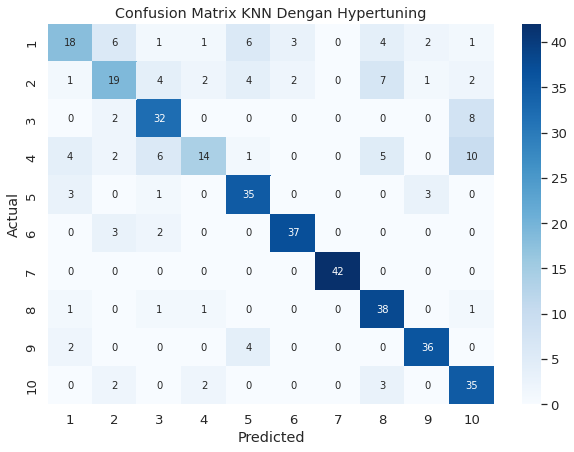

In [ ]:
confmatrix (y_pred, 'Confusion Matrix KNN Dengan Hypertuning')

Tanpa Hypertuning

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

#Mengubah ke dataframe
knn_tanpa_hypertuning = get_classification_report(y_test, y_pred)
knn_tanpa_hypertuning.to_csv('/content/drive/MyDrive/KULIAH/KELAS AI/HASIL/knn_tanpa_hypertuning.csv')

              precision    recall  f1-score   support

           1       0.50      0.36      0.42        42
           2       0.39      0.21      0.28        42
           3       0.67      0.74      0.70        42
           4       0.45      0.24      0.31        42
           5       0.72      0.67      0.69        42
           6       0.88      0.88      0.88        42
           7       0.98      0.98      0.98        42
           8       0.65      0.93      0.76        42
           9       0.73      0.83      0.78        42
          10       0.51      0.83      0.64        42

    accuracy                           0.67       420
   macro avg       0.65      0.67      0.64       420
weighted avg       0.65      0.67      0.64       420



# Random Forest Classifier

Hypertuning Parameter dengan menggunakan `RandomGrid`

In [ ]:
#hyperparameter[
n_estimators = [5,10,15,20,25,50]
max_features = ['auto', 'log2', 'sqrt'] #jumlah fitur yang dikonsiderasikan pada tiap split
max_depth = [int(x) for x in np.linspace(10, 20, num = 12)] #jumlah maksimal level yg diperbolehkan pada tiap decision tree
min_samples_split = [2, 6, 10] #jumlah minimun sampel untuk di split menjadi node
min_samples_leaf = [1, 3, 4] #jumlah sampel minimum untuk disimpan pada leaf
bootstrap = [True, False] 


x = df.drop('class', axis=1)
y = df['class']

# dilakukan oversampling berdasarkan data yang paling banyak
smote = SMOTE(random_state=11)
X_baru, y_baru = smote.fit_resample(x,y)

#split dengan ratio 50 50
X_train, X_test, y_train, y_test = train_test_split(X_baru, y_baru, test_size = 0.5, random_state=11, stratify=y_baru)

# dilakukan cross validation dengan teknik KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=11)

random_grid = { 'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
rf = RandomForestClassifier ()
rf_search = GridSearchCV (rf, param_grid = random_grid, cv = kfold,  n_jobs = -1)

rf_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=11, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 10, 11, 12, 13, 14, 15, 16, 17, 18,
                                       19, 20],
                         'max_features': ['auto', 'log2', 'sqrt'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [5, 10, 15, 20, 25, 50]})

Melihat parameter terbaik

In [ ]:
rf_search.best_params_

{'bootstrap': False,
 'max_depth': 12,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 50}

Memakai parameter terbaik

In [ ]:
randmf = RandomForestClassifier ( n_estimators =  50,
                                 min_samples_split = 6,
                                 min_samples_leaf = 1,
                                 max_features = 'auto',
                                 max_depth = 12,
                                 bootstrap = False)
randmf.fit (X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=12, min_samples_split=6,
                       n_estimators=50)

In [ ]:
y_pred = randmf.predict(X_test)
print(classification_report(y_test, y_pred))

#Mengubah ke dataframe
RF_hypertuning = get_classification_report(y_test, y_pred)
RF_hypertuning.to_csv('/content/drive/MyDrive/KULIAH/KELAS AI/HASIL/rf_hypertuning.csv')

              precision    recall  f1-score   support

           1       0.56      0.60      0.57        42
           2       0.81      0.40      0.54        42
           3       0.70      0.76      0.73        42
           4       0.61      0.33      0.43        42
           5       0.76      0.81      0.78        42
           6       0.89      0.95      0.92        42
           7       0.98      1.00      0.99        42
           8       0.67      0.90      0.77        42
           9       0.92      0.81      0.86        42
          10       0.60      0.83      0.70        42

    accuracy                           0.74       420
   macro avg       0.75      0.74      0.73       420
weighted avg       0.75      0.74      0.73       420



**Confusion Matrix**

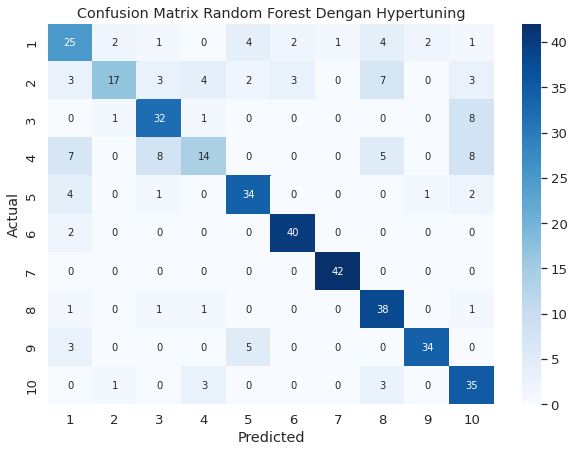

In [ ]:
confmatrix (y_pred, 'Confusion Matrix Random Forest Dengan Hypertuning')

Tanpa hypertuning

In [ ]:
rf = RandomForestClassifier ()
rf.fit (X_train, y_train)

y_pred = rf.predict (X_test)
print(classification_report(y_test, y_pred))

#Mengubah ke dataframe
RF_tanpa_hypertuning = get_classification_report(y_test, y_pred)
RF_tanpa_hypertuning.to_csv('/content/drive/MyDrive/KULIAH/KELAS AI/HASIL/rf_tanpa_hypertuning.csv')

              precision    recall  f1-score   support

           1       0.57      0.57      0.57        42
           2       0.74      0.40      0.52        42
           3       0.70      0.76      0.73        42
           4       0.57      0.29      0.38        42
           5       0.70      0.79      0.74        42
           6       0.83      0.95      0.89        42
           7       1.00      1.00      1.00        42
           8       0.68      0.90      0.78        42
           9       0.89      0.79      0.84        42
          10       0.60      0.83      0.70        42

    accuracy                           0.73       420
   macro avg       0.73      0.73      0.71       420
weighted avg       0.73      0.73      0.71       420



# Decision Tree

Hypertuning Parameter dengan mengunakan `GridSearch`

In [ ]:
#hyperparameter

max_depth = [2,5,10,15,20]
criterion = ['gini', 'entropy', 'log_loss']

In [ ]:
x = df.drop('class', axis=1)
y = df['class']

# dilakukan oversampling berdasarkan data yang paling banyak
smote = SMOTE(random_state=11)
X_baru, y_baru = smote.fit_resample(x,y)

#split dengan ratio 50 50
X_train, X_test, y_train, y_test = train_test_split(X_baru, y_baru, test_size = 0.5, random_state=11, stratify=y_baru)

# dilakukan cross validation dengan teknik KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=11)

#hyperparameter
param_grid = {'max_depth'         : max_depth, 
              'criterion'         : criterion  }

grid_search = GridSearchCV(DecisionTreeClassifier(),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=11, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 5, 10, 15, 20]},
             scoring='accuracy')

In [ ]:
grid_search.best_params_ #menampilkan best parameter 

{'criterion': 'entropy', 'max_depth': 10}

Memakai parameter terbaik

In [ ]:
dt_best = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10)
dt_best.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

Melihat performance dengan menggunakan `classification report`

In [ ]:
y_pred = dt_best.predict(X_test)
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

        lung       0.50      0.48      0.49        42
     stomach       0.49      0.40      0.44        42
       ovary       0.78      0.76      0.77        42
    pancreas       0.71      0.29      0.41        42
      kidney       0.73      0.86      0.79        42
      breast       0.76      0.76      0.76        42
 head & neck       0.95      1.00      0.98        42
  gallblader       0.67      0.90      0.77        42
     thyroid       0.89      0.74      0.81        42
       colon       0.60      0.86      0.71        42

    accuracy                           0.70       420
   macro avg       0.71      0.70      0.69       420
weighted avg       0.71      0.70      0.69       420



Mengubah ke Dataframe

In [ ]:
DT_hypertuning = get_classification_report(y_test, y_pred)
DT_hypertuning.to_csv('/content/drive/MyDrive/KULIAH/KELAS AI/HASIL/dt_hypertuning.csv')

**Confusion Matrix**

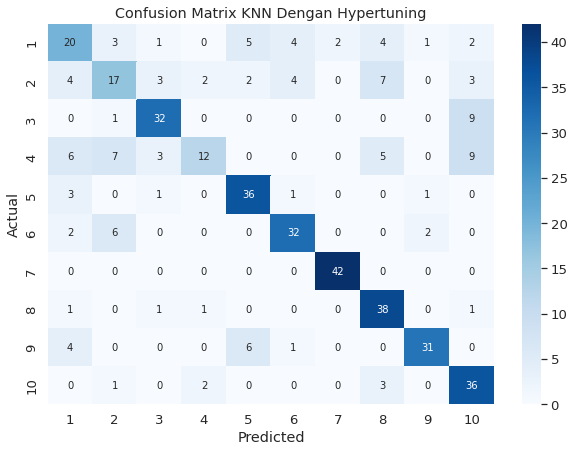

In [ ]:
confmatrix (y_pred, 'Confusion Matrix KNN Dengan Hypertuning')

Tanpa Hypertuning

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred, target_names = target_names))

              precision    recall  f1-score   support

        lung       0.55      0.40      0.47        42
     stomach       0.55      0.38      0.45        42
       ovary       0.73      0.76      0.74        42
    pancreas       0.57      0.29      0.38        42
      kidney       0.76      0.74      0.75        42
      breast       0.85      0.95      0.90        42
 head & neck       1.00      1.00      1.00        42
  gallblader       0.68      0.90      0.78        42
     thyroid       0.88      0.86      0.87        42
       colon       0.53      0.86      0.65        42

    accuracy                           0.71       420
   macro avg       0.71      0.71      0.70       420
weighted avg       0.71      0.71      0.70       420



Mengubah ke Dataframe

In [ ]:
DT_tanpa_hypertuning = get_classification_report(y_test, y_pred)
DT_tanpa_hypertuning.to_csv('/content/drive/MyDrive/KULIAH/KELAS AI/HASIL/dt_tanpa_hypertuning.csv')

Visualize DTrees - Hypertuning

Decision Tree Plot- Hypertuning parameter
Depth: 10 	 N-Leaves: 119


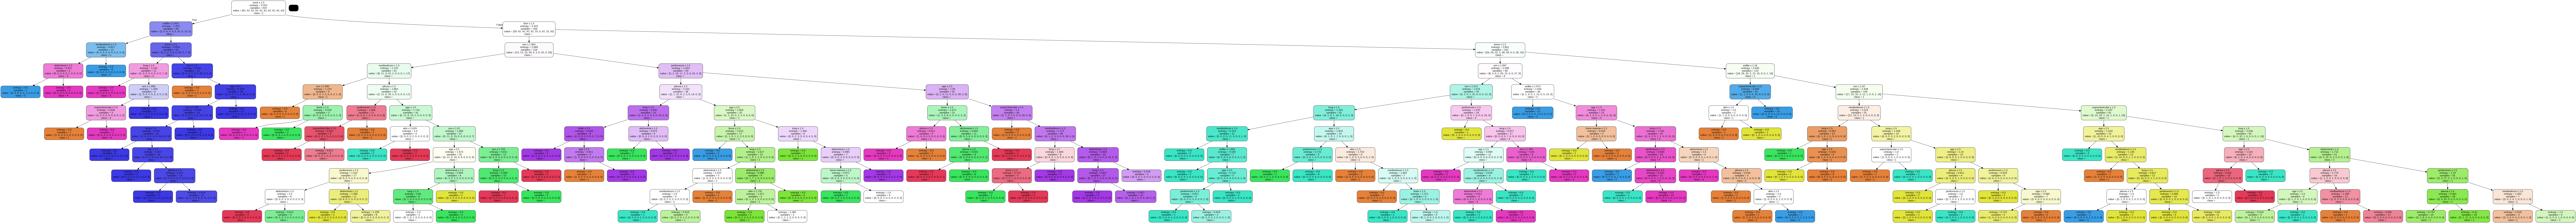

In [ ]:
print("Decision Tree Plot- Hypertuning parameter")
print("Depth: {} \t N-Leaves: {}".format(dt_best.get_depth(), dt_best.get_n_leaves()))

feature_col = x.columns

class_col = pd.unique(y_train)
class_col = np.array(class_col)
class_col = str(class_col)

dot_data = StringIO()
export_graphviz(dt_best, out_file=dot_data, filled=True, rounded=True, special_characters=True,
               feature_names=feature_col, class_names=class_col)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Visualisasi DTrees - Tanpa Hypertuning

Decision Tree Plot- Hypertuning parameter
Depth: 15 	 N-Leaves: 145


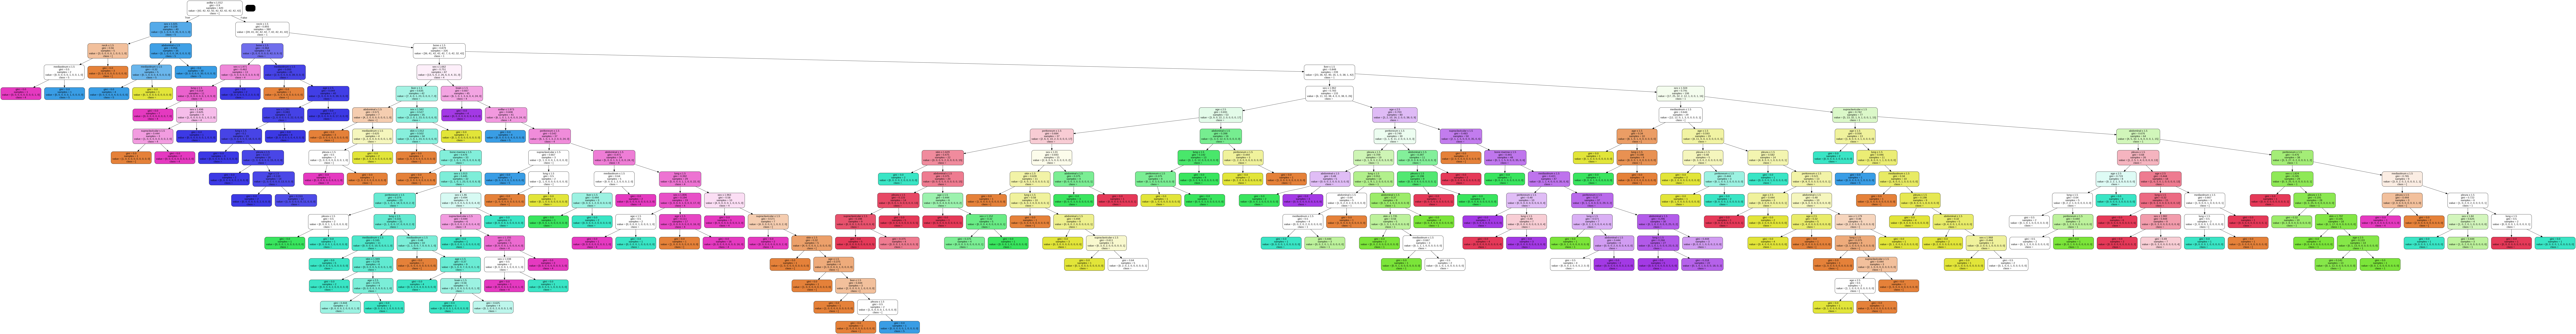

In [ ]:
print("Decision Tree Plot- Hypertuning parameter")
print("Depth: {} \t N-Leaves: {}".format(dt.get_depth(), dt.get_n_leaves()))

feature_col = x.columns

class_col = pd.unique(y_train)
class_col = np.array(class_col)
class_col = str(class_col)

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, special_characters=True,
               feature_names=feature_col, class_names=class_col)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# GRAFIK PERBANDINGAN GABUNGAN CLASSIFIER

In [ ]:
# path yang digunakan dan read csv

knn_hypertuning = pd.read_csv('/content/drive/MyDrive/KULIAH/KELAS AI/HASIL/knn_hypertuning.csv') 
knn_tanpa_hypertuning =pd.read_csv('/content/drive/MyDrive/KULIAH/KELAS AI/HASIL/knn_tanpa_hypertuning.csv')

rf_hypertuning = pd.read_csv('/content/drive/MyDrive/KULIAH/KELAS AI/HASIL/rf_hypertuning.csv') 
rf_tanpa_hypertuning = pd.read_csv('/content/drive/MyDrive/KULIAH/KELAS AI/HASIL/rf_tanpa_hypertuning.csv') 

dt_hypertuning = pd.read_csv('/content/drive/MyDrive/KULIAH/KELAS AI/HASIL/dt_hypertuning.csv')
dt_tanpa_hypertuning =  pd.read_csv('/content/drive/MyDrive/KULIAH/KELAS AI/HASIL/dt_tanpa_hypertuning.csv')

In [ ]:
def replace(df) :
  df.rename( columns={'Unnamed: 0':'kelas'}, inplace=True)
  df['kelas']  = df['kelas'].str.replace('1', 'lung')
  df['kelas']  = df['kelas'].str.replace('2', 'stomach')
  df['kelas']  = df['kelas'].str.replace('3', 'ovary')
  df['kelas']  = df['kelas'].str.replace('4', 'pancreas')
  df['kelas']  = df['kelas'].str.replace('5', 'kidney')
  df['kelas']  = df['kelas'].str.replace('6', 'breast')
  df['kelas']  = df['kelas'].str.replace('7', 'head & neck')
  df['kelas']  = df['kelas'].str.replace('8', 'gallblader')
  df['kelas']  = df['kelas'].str.replace('9', 'thyroid')
  df['kelas']  = df['kelas'].str.replace('lung0', 'colon')
  return df

In [ ]:
a = replace(knn_hypertuning)
b = replace(knn_tanpa_hypertuning)
c = replace(rf_tanpa_hypertuning)
d = replace(rf_hypertuning)
e = replace(dt_hypertuning)
f = replace(dt_tanpa_hypertuning)

In [ ]:
b

kelas  precision    recall  f1-score     support
0           lung   0.500000  0.357143  0.416667   42.000000
1        stomach   0.391304  0.214286  0.276923   42.000000
2          ovary   0.673913  0.738095  0.704545   42.000000
3       pancreas   0.454545  0.238095  0.312500   42.000000
4         kidney   0.717949  0.666667  0.691358   42.000000
5         breast   0.880952  0.880952  0.880952   42.000000
6    head & neck   0.976190  0.976190  0.976190   42.000000
7     gallblader   0.650000  0.928571  0.764706   42.000000
8        thyroid   0.729167  0.833333  0.777778   42.000000
9          colon   0.514706  0.833333  0.636364   42.000000
10      accuracy   0.666667  0.666667  0.666667    0.666667
11     macro avg   0.648873  0.666667  0.643798  420.000000
12  weighted avg   0.648873  0.666667  0.643798  420.000000

In [ ]:
def tabel_precision(df,da,dc,de,dg,dh):
  #pertama
  df = df.drop(['recall', 'f1-score', 'support'], axis=1)

  #hanya menampilkan rows dengan nama target dan rows accuracy dan lainnya di drop
  df = df[df["kelas"].isin(target_names)]
  df = df.rename({'precision': 'Knn_Hypertuning'}, axis=1)

  #kedua
  da = da.drop(['recall', 'f1-score', 'support'], axis=1)

  #hanya menampilkan rows dengan nama target dan rows accuracy dan lainnya di drop
  da = da[da["kelas"].isin(target_names)]
  da = da.rename({'precision': 'Knn_Tanpa_Hypertuning'}, axis=1)

  #ketiga
  dc = dc.drop(['recall', 'f1-score', 'support'], axis=1)

  #hanya menampilkan rows dengan nama target dan rows accuracy dan lainnya di drop
  dc = dc[dc["kelas"].isin(target_names)]
  dc = dc.rename({'precision': 'rf_Tanpa_Hypertuning'}, axis=1)

  #keempat
  de = de.drop(['recall', 'f1-score', 'support'], axis=1)

  #hanya menampilkan rows dengan nama target dan rows accuracy dan lainnya di drop
  de = de[de["kelas"].isin(target_names)]
  de = de.rename({'precision': 'rf_Hypertuning'}, axis=1)

  #kelima
  dg = dg.drop(['recall', 'f1-score', 'support'], axis=1)

  #hanya menampilkan rows dengan nama target dan rows accuracy dan lainnya di drop
  dg = dg[dg["kelas"].isin(target_names)]
  dg = dg.rename({'precision': 'dt_Hypertuning'}, axis=1)

  #keenam
  dh = dh.drop(['recall', 'f1-score', 'support'], axis=1)

  #hanya menampilkan rows dengan nama target dan rows accuracy dan lainnya di drop
  dh = dh[dh["kelas"].isin(target_names)]
  dh = dh.rename({'precision': 'dt_Tanpa_Hypertuning'}, axis=1)

  # merge dataframe 
  concat = pd.merge(df, da)
  concat_2 = pd.merge(concat, de)
  concat_3 = pd.merge(concat_2,dc)
  concat_4 = pd.merge(concat_3,dg)
  concat_5 = pd.merge(concat_4,dh)
  concat_5.set_index('kelas', inplace=True)
  return concat_5

def tabel_recall(df,da,dc,de,dg,dh):
  #pertama
  df = df.drop(['precision', 'f1-score', 'support'], axis=1)

  #hanya menampilkan rows dengan nama target dan rows accuracy dan lainnya di drop
  df = df[df["kelas"].isin(target_names)]
  df = df.rename({'recall': 'Knn_Hypertuning'}, axis=1)

  #kedua
  da = da.drop(['precision', 'f1-score', 'support'], axis=1)

  #hanya menampilkan rows dengan nama target dan rows accuracy dan lainnya di drop
  da = da[da["kelas"].isin(target_names)]
  da = da.rename({'recall': 'Knn_Tanpa_Hypertuning'}, axis=1)

  #ketiga
  dc = dc.drop(['precision', 'f1-score', 'support'], axis=1)

  #hanya menampilkan rows dengan nama target dan rows accuracy dan lainnya di drop
  dc = dc[dc["kelas"].isin(target_names)]
  dc = dc.rename({'recall': 'rf_Tanpa_Hypertuning'}, axis=1)

  #keempat
  de = de.drop(['precision', 'f1-score', 'support'], axis=1)

  #hanya menampilkan rows dengan nama target dan rows accuracy dan lainnya di drop
  de = de[de["kelas"].isin(target_names)]
  de = de.rename({'recall': 'rf_Hypertuning'}, axis=1)

  #kelima
  dg = dg.drop(['precision', 'f1-score', 'support'], axis=1)

  #hanya menampilkan rows dengan nama target dan rows accuracy dan lainnya di drop
  dg = dg[dg["kelas"].isin(target_names)]
  dg = dg.rename({'recall': 'dt_Hypertuning'}, axis=1)

  #keenam
  dh = dh.drop(['precision', 'f1-score', 'support'], axis=1)

  #hanya menampilkan rows dengan nama target dan rows accuracy dan lainnya di drop
  dh = dh[dh["kelas"].isin(target_names)]
  dh = dh.rename({'recall': 'dt_Tanpa_Hypertuning'}, axis=1)

  # merge dataframe 
  concat = pd.merge(df, da)
  concat_2 = pd.merge(concat, de)
  concat_3 = pd.merge(concat_2,dc)
  concat_4 = pd.merge(concat_3,dg)
  concat_5 = pd.merge(concat_4,dh)
  concat_5.set_index('kelas', inplace=True)
  return concat_5

def tabel_f1(df,da,dc,de,dg,dh):
  #pertama
  df = df.drop(['precision', 'recall', 'support'], axis=1)

  #hanya menampilkan rows dengan nama target dan rows accuracy dan lainnya di drop
  df = df[df["kelas"].isin(target_names)]
  df = df.rename({'f1-score': 'Knn_Hypertuning'}, axis=1)

  #kedua
  da = da.drop(['precision', 'recall', 'support'], axis=1)

  #hanya menampilkan rows dengan nama target dan rows accuracy dan lainnya di drop
  da = da[da["kelas"].isin(target_names)]
  da = da.rename({'f1-score': 'Knn_Tanpa_Hypertuning'}, axis=1)

  #ketiga
  dc = dc.drop(['precision', 'recall', 'support'], axis=1)

  #hanya menampilkan rows dengan nama target dan rows accuracy dan lainnya di drop
  dc = dc[dc["kelas"].isin(target_names)]
  dc = dc.rename({'f1-score': 'rf_Tanpa_Hypertuning'}, axis=1)

  #keempat
  de = de.drop(['precision', 'recall', 'support'], axis=1)

  #hanya menampilkan rows dengan nama target dan rows accuracy dan lainnya di drop
  de = de[de["kelas"].isin(target_names)]
  de = de.rename({'f1-score': 'rf_Hypertuning'}, axis=1)

  #kelima
  dg = dg.drop(['precision', 'recall', 'support'], axis=1)

  #hanya menampilkan rows dengan nama target dan rows accuracy dan lainnya di drop
  dg = dg[dg["kelas"].isin(target_names)]
  dg = dg.rename({'f1-score': 'dt_Hypertuning'}, axis=1)

  #keenam
  dh = dh.drop(['precision', 'recall', 'support'], axis=1)

  #hanya menampilkan rows dengan nama target dan rows accuracy dan lainnya di drop
  dh = dh[dh["kelas"].isin(target_names)]
  dh = dh.rename({'f1-score': 'dt_Tanpa_Hypertuning'}, axis=1)

  # merge dataframe 
  concat = pd.merge(df, da)
  concat_2 = pd.merge(concat, de)
  concat_3 = pd.merge(concat_2,dc)
  concat_4 = pd.merge(concat_3,dg)
  concat_5 = pd.merge(concat_4,dh)
  concat_5.set_index('kelas', inplace=True)
  return concat_5

def akurasi(df,da,dc,de,dg,dh):

  list = ['accuracy']

  #pertama
  df = df.drop(['precision', 'recall', 'support'], axis=1)

  #hanya menampilkan rows dengan nama target dan rows accuracy dan lainnya di drop
  df = df[df["kelas"].isin(list)]
  df = df.rename({'f1-score': 'Knn_Hypertuning'}, axis=1)

  #kedua
  da = da.drop(['precision', 'recall', 'support'], axis=1)

  #hanya menampilkan rows dengan nama target dan rows accuracy dan lainnya di drop
  da = da[da["kelas"].isin(list)]
  da = da.rename({'f1-score': 'Knn_Tanpa_Hypertuning'}, axis=1)

  #ketiga
  dc = dc.drop(['precision', 'recall', 'support'], axis=1)

  #hanya menampilkan rows dengan nama target dan rows accuracy dan lainnya di drop
  dc = dc[dc["kelas"].isin(list)]
  dc = dc.rename({'f1-score': 'rf_Tanpa_Hypertuning'}, axis=1)

  #keempat
  de = de.drop(['precision', 'recall', 'support'], axis=1)

  #hanya menampilkan rows dengan nama target dan rows accuracy dan lainnya di drop
  de = de[de["kelas"].isin(list)]
  de = de.rename({'f1-score': 'rf_Hypertuning'}, axis=1)

  #kelima
  dg = dg.drop(['precision', 'recall', 'support'], axis=1)

  #hanya menampilkan rows dengan nama target dan rows accuracy dan lainnya di drop
  dg = dg[dg["kelas"].isin(list)]
  dg = dg.rename({'f1-score': 'dt_Hypertuning'}, axis=1)

  #keenam
  dh = dh.drop(['precision', 'recall', 'support'], axis=1)

  #hanya menampilkan rows dengan nama target dan rows accuracy dan lainnya di drop
  dh = dh[dh["kelas"].isin(list)]
  dh = dh.rename({'f1-score': 'dt_Tanpa_Hypertuning'}, axis=1)

  # merge dataframe 
  concat = pd.merge(df, da)
  concat_2 = pd.merge(concat, de)
  concat_3 = pd.merge(concat_2,dc)
  concat_4 = pd.merge(concat_3,dg)
  concat_5 = pd.merge(concat_4,dh)
  concat_5 = concat_5.rename({'kelas': 'akurasi'}, axis=1)
  concat_5.set_index('akurasi', inplace=True)

  return concat_5


In [ ]:
precision = tabel_precision(a,b,c,d,e,f)
recall = tabel_recall(a,b,c,d,e,f)
f1_score = tabel_f1(a,b,c,d,e,f)
akurasi = akurasi(a,b,c,d,e,f)

In [ ]:
akurasi

Knn_Hypertuning  Knn_Tanpa_Hypertuning  rf_Hypertuning  \
akurasi                                                            
accuracy         0.728571               0.666667        0.740476   

          rf_Tanpa_Hypertuning  dt_Hypertuning  dt_Tanpa_Hypertuning  
akurasi                                                               
accuracy              0.728571        0.704762              0.714286

In [ ]:
precision

Knn_Hypertuning  Knn_Tanpa_Hypertuning  rf_Hypertuning  \
kelas                                                                 
lung                0.620690               0.500000        0.555556   
stomach             0.558824               0.391304        0.809524   
ovary               0.680851               0.673913        0.695652   
pancreas            0.700000               0.454545        0.608696   
kidney              0.700000               0.717949        0.755556   
breast              0.880952               0.880952        0.888889   
head & neck         1.000000               0.976190        0.976744   
gallblader          0.666667               0.650000        0.666667   
thyroid             0.857143               0.729167        0.918919   
colon               0.614035               0.514706        0.603448   

             rf_Tanpa_Hypertuning  dt_Hypertuning  dt_Tanpa_Hypertuning  
kelas                                                                    
lung                     0.571429        0.500000              0.548387  
stomach                  0.739130        0.485714              0.551724  
ovary                    0.695652        0.780488              0.727273  
pancreas                 0.571429        0.705882              0.571429  
kidney                   0.702128        0.734694              0.756098  
breast                   0.833333        0.761905              0.851064  
head & neck              1.000000        0.954545              1.000000  
gallblader               0.678571        0.666667              0.678571  
thyroid                  0.891892        0.885714              0.878049  
colon                    0.603448        0.600000              0.529412

GRAFIK PERBANDINGAN DENGAN BAR PLOT (PRECISION, RECALL, DAN F1-SCORE)

In [ ]:
color_map=['darkgray','gray','dimgray','lightgray']

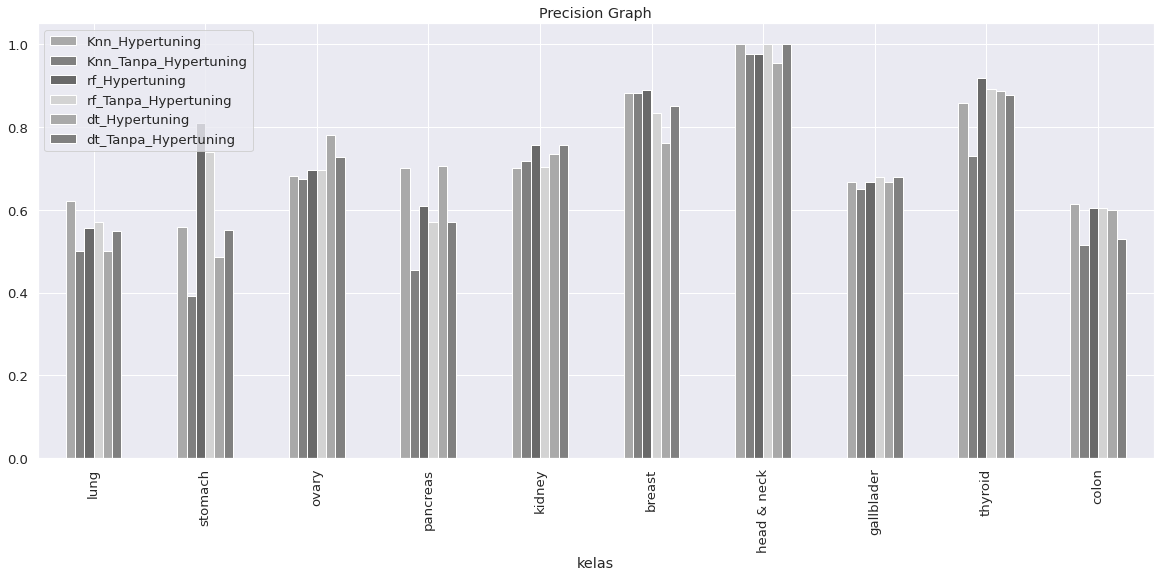

In [ ]:
# grafik precision
precision.plot(color= color_map, figsize=(20,8), title = 'Grafik Precision', kind = 'bar')

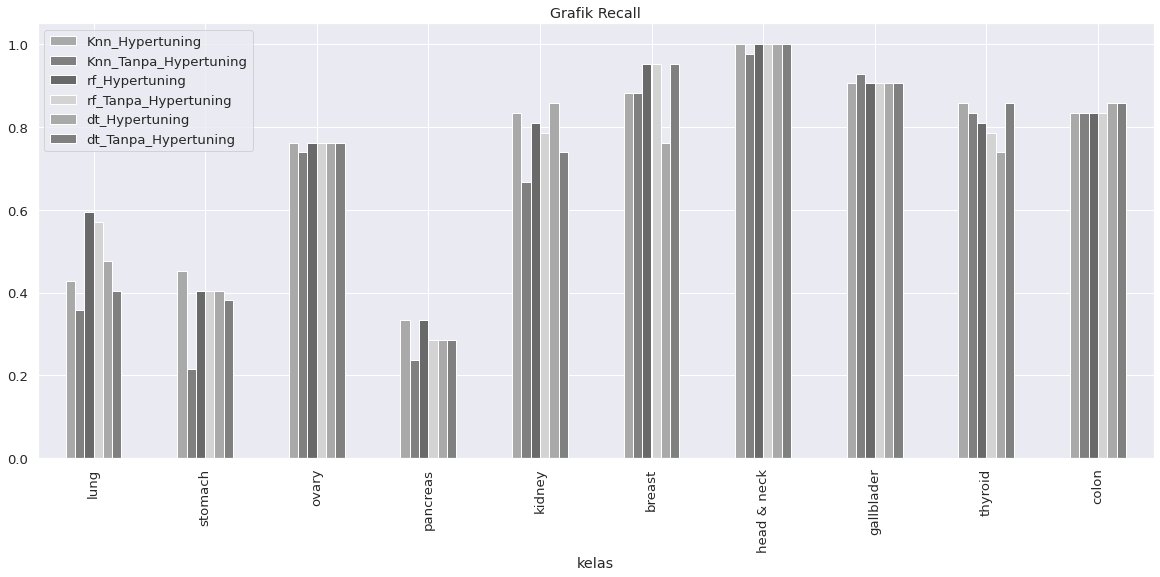

In [ ]:
# grafik recall
recall.plot(color= color_map, figsize=(20,8), title = 'Grafik Recall', kind = 'bar')

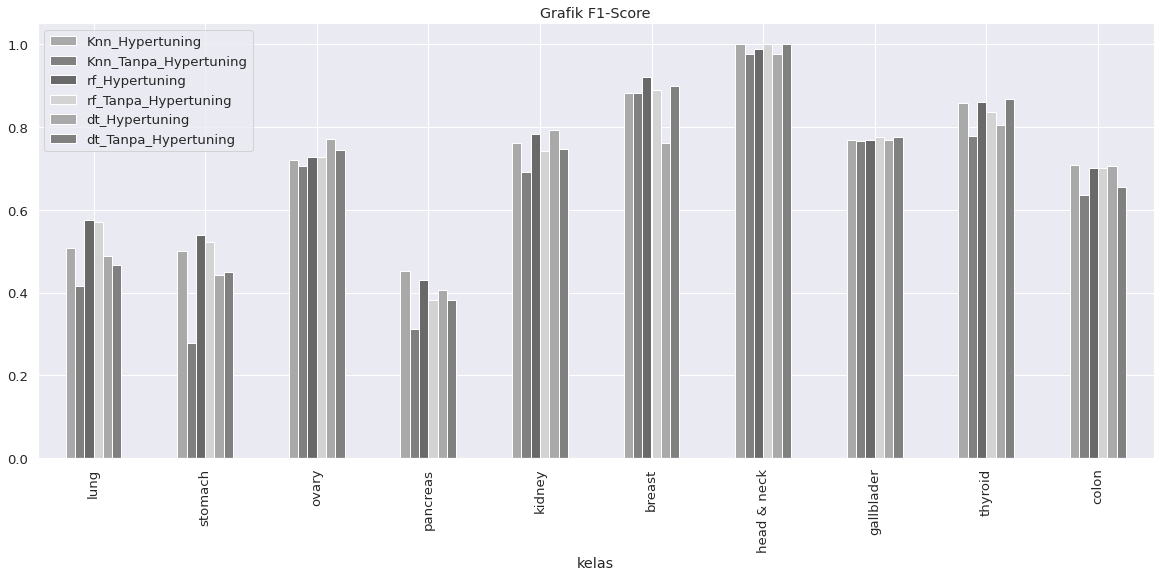

In [ ]:
#grafik f1-score
f1_score.plot(color= color_map, figsize=(20,8), title = 'Grafik F1-Score', kind = 'bar')

GRAFIK PERBANDINGAN AKURASI DENGAN LINE PLOT

In [ ]:
akurasi

Knn_Hypertuning  Knn_Tanpa_Hypertuning  rf_Hypertuning  \
akurasi                                                            
accuracy         0.728571               0.666667        0.740476   

          rf_Tanpa_Hypertuning  dt_Hypertuning  dt_Tanpa_Hypertuning  
akurasi                                                               
accuracy              0.728571        0.704762              0.714286

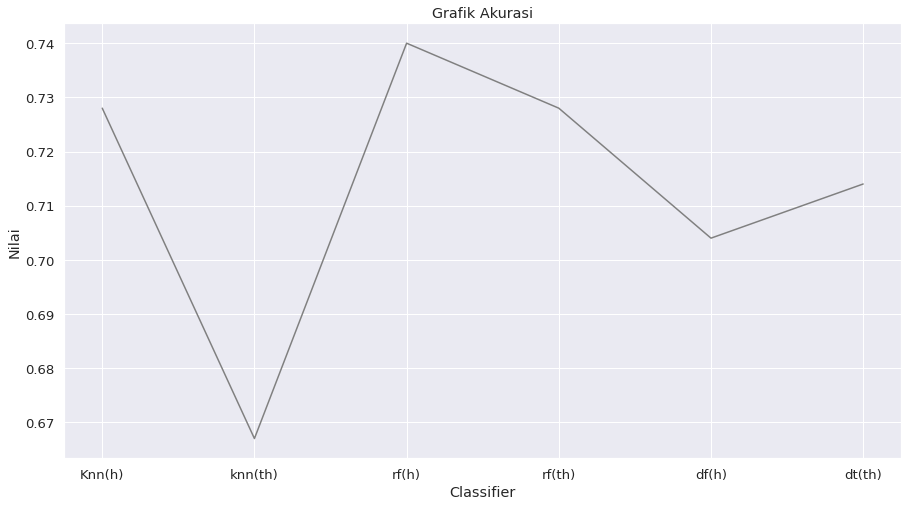

In [ ]:
x = ['Knn(h)', 'knn(th)', 'rf(h)', 'rf(th)', 'df(h)', 'dt(th)']
y = [0.728,0.667,0.740,0.728,0.704,0.714]

plt.figure(figsize = (15, 8))
plt.plot(x, y, color='gray')
plt.title('Grafik Akurasi')
plt.xlabel('Classifier')
plt.ylabel('Nilai')
plt.show()